# CONEXIÓN a API DE BLUESKY

In [39]:
import requests

url = "https://bsky.social/xrpc/app.bsky.feed.getAuthorFeed"

url_se = "https://bsky.social/xrpc/com.atproto.server.createSession"
payload = {
  "identifier": "grupo18.bsky.social",
  "password":'Grupo18*BS'
}
response_tk = requests.post(url_se, json=payload)
response_tk.raise_for_status()
token = response_tk.json()["accessJwt"]  # Token de acceso


## Búsqueda de actores por palabras clave

In [41]:
import requests
import pandas as pd

# URL del endpoint de búsqueda de actores
url = "https://bsky.social/xrpc/app.bsky.actor.searchActors"

# Parámetros de búsqueda
params = {
    "term": "bloomberg",  # Término de búsqueda
    "limit": 10  # Número de resultados a mostrar
}

# Headers con el token de autenticación
headers = {
    "Authorization": f"Bearer {token}"
}

# Realizar la petición
response = requests.get(url, headers=headers, params=params)
response.raise_for_status()

# Procesar la respuesta
search_data = response.json()
actors = []

for actor in search_data['actors']:
    actor_data = {
        'did': actor['did'],
        'handle': actor['handle'],
        'display_name': actor.get('displayName', ''),
        'description': actor.get('description', ''),
        'followers_count': actor.get('followersCount', 0),
        'follows_count': actor.get('followsCount', 0),
        'posts_count': actor.get('postsCount', 0)
    }
    actors.append(actor_data)

# Crear y mostrar el DataFrame
df_actors = pd.DataFrame(actors)
print("\nResultados de búsqueda de actores:")
display(df_actors)


Resultados de búsqueda de actores:


,did,handle,display_name,description,followers_count,follows_count,posts_count
0,did:plc:uewxgchsjy4kmtu7dcxa77us,bloomberg.com,Bloomberg News,The first word in business news. \nNewsletters...,0,0,0
1,did:plc:djdxfzbvmvjmjlj3qu32uy2i,daveweigel.bsky.social,Dave Weigel,National politics reporter at semafor.com. Alu...,0,0,0
2,did:plc:2mkgbhbhqvappkkorf2bzyrp,jasonschreier.bsky.social,Jason Schreier,Reporter at Bloomberg | co-host of Triple Clic...,0,0,0
3,did:plc:mwwn3r5llzsfassowreprqus,amandamull.bsky.social,Amanda Mull,Senior reporter and Buying Power columnist at ...,0,0,0
4,did:plc:eeitvtxcbjt3vmljqfmwzahz,jasonleopold.bsky.social,Jason Leopold,"Investigative Reporter, Bloomberg News. ""FOIA ...",0,0,0
5,did:plc:p2gx4zjzdv3t55mll7iiuov3,davey.bsky.social,Davey Alba,"Bloomberg tech reporter / Google, Big Tech, mi...",0,0,0
6,did:plc:6edxc56gc2sntq6ht6epjug4,steventdennis.bsky.social,Steven T. Dennis,I cover the U.S. Senate for Bloomberg News. Yo...,0,0,0
7,did:plc:q5wqr7zofdqyqwoki4cby36x,conorsen.bsky.social,Conor Sen,"Bloomberg Opinion columnist, Buc-ee’s fan\n\n📍...",0,0,0
8,did:plc:ui32plrlzbu7h2xhbqngeu7s,heidireports.bsky.social,Heidi Przybyla 🎤✍️,"Award-winning print, digital and TV investigat...",0,0,0
9,did:plc:pnx2fjuannbdpy3337ggthpp,peark.es,George Pearkes,No longer Bluesky’s only resident finance bro ...,0,0,0


In [42]:
# Colocamos el actor que preferimos de la lista de actores  
params = {
  "actor": "bloomberg.com",
  "limit": 25
}

url = "https://bsky.social/xrpc/app.bsky.feed.getAuthorFeed"

headers = {
  "Authorization": f"Bearer {token}"
}

response = requests.get(url, headers=headers, params=params)
response.raise_for_status()

## Transformar las salida de la API en un Panda

In [43]:
import pandas as pd
from datetime import datetime

# Crear DataFrame con los resultados
feed_data = response.json()
posts = []

for post in feed_data['feed']:
    post_data = {
        'uri': post['post']['uri'],
        'text': post['post']['record'].get('text', ''),
        'created_at': datetime.fromisoformat(post['post']['record']['createdAt'].replace('Z', '+00:00')),
        'likes': post['post']['likeCount'],
        'reposts': post['post']['repostCount'],
        'replies': post['post']['replyCount']
    }
    posts.append(post_data)

df = pd.DataFrame(posts)
print("\nFeed de unusualwhales.bsky.social:")
display(df)


Feed de unusualwhales.bsky.social:


,uri,text,created_at,likes,reposts,replies
0,at://did:plc:uewxgchsjy4kmtu7dcxa77us/app.bsky...,President Donald Trump will consider a proposa...,2025-04-01 22:21:45.528000+00:00,31,12,10
1,at://did:plc:uewxgchsjy4kmtu7dcxa77us/app.bsky...,Trump’s reciprocal tariffs have sparked fears ...,2025-04-01 22:20:39.708000+00:00,52,13,8
2,at://did:plc:uewxgchsjy4kmtu7dcxa77us/app.bsky...,Trump's oil policies have Wall Street rethinki...,2025-04-01 21:19:18.329000+00:00,32,8,11
3,at://did:plc:b6nazhaza26jp3eog5ue4ipt/app.bsky...,The National Weather Service will stop issuing...,2025-04-01 20:52:28.559000+00:00,642,384,42
4,at://did:plc:eeitvtxcbjt3vmljqfmwzahz/app.bsky...,"NEW: CDC FOIA page are being dismantled, inclu...",2025-04-01 19:52:02.161000+00:00,571,353,27
5,at://did:plc:q7iggtywwxvr7hr7axinzt6q/app.bsky...,Is this really the end of American exceptional...,2025-04-01 17:30:16.213000+00:00,32,10,14
6,at://did:plc:uewxgchsjy4kmtu7dcxa77us/app.bsky...,Conservative media outlet Newsmax is having a ...,2025-04-01 18:21:15.010000+00:00,28,10,6
7,at://did:plc:uewxgchsjy4kmtu7dcxa77us/app.bsky...,President Donald Trump’s sweeping tariffs will...,2025-04-01 18:12:00.400000+00:00,51,22,31
8,at://did:plc:uewxgchsjy4kmtu7dcxa77us/app.bsky...,Analysts at Bloomberg Intelligence have sifted...,2025-04-01 17:57:31.978000+00:00,9,3,4
9,at://did:plc:uewxgchsjy4kmtu7dcxa77us/app.bsky...,"Once considered obscure or opportunistic, inva...",2025-04-01 17:25:31.575000+00:00,87,35,9


## Análisis preliminar aplicando minería de texto básica sobre el panda de posts obtenidos de BLUESKY

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FSONZOGNI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FSONZOGNI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\FSONZOGNI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


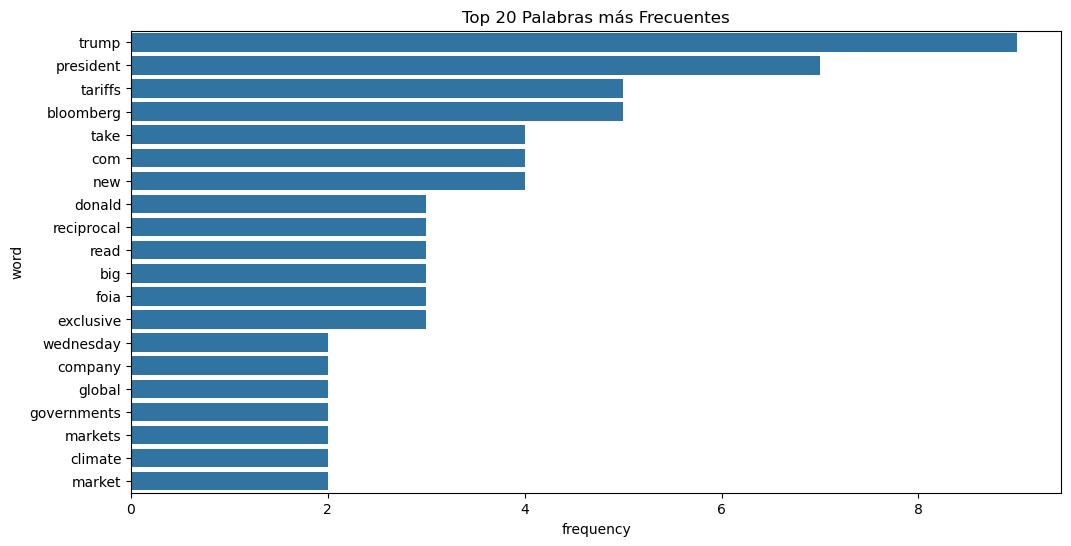


Frecuencia de palabras:


,word,frequency
0,trump,9
1,president,7
2,tariffs,5
3,bloomberg,5
4,take,4
5,com,4
6,new,4
7,donald,3
8,reciprocal,3
9,read,3


In [45]:
# Nueva celda para análisis de texto
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Descargar todos los recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

def analyze_text(text_series):
    # Convertir a minúsculas y unir todos los textos
    all_text = ' '.join(text_series.str.lower())
    
    # Limpiar el texto de caracteres especiales y números
    all_text = re.sub(r'[^\w\s]', ' ', all_text)
    
    # Tokenizar el texto (usando un método más simple)
    tokens = all_text.split()
    
    # Eliminar stopwords y palabras cortas
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    # Contar frecuencia de palabras
    word_freq = Counter(filtered_tokens)
    
    # Crear DataFrame con las palabras más frecuentes
    df_word_freq = pd.DataFrame(word_freq.most_common(20), columns=['word', 'frequency'])
    
    # Visualizar las palabras más frecuentes
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_word_freq, x='frequency', y='word')
    plt.title('Top 20 Palabras más Frecuentes')
    plt.show()
    
    return df_word_freq

# Aplicar análisis al texto de los posts
word_frequency_df = analyze_text(df['text'])
print("\nFrecuencia de palabras:")
display(word_frequency_df)